In [16]:
# 라이브러리
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from pandas.plotting import autocorrelation_plot

In [17]:
df = pd.read_csv('BTC-USD.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [18]:
df.Date = pd.to_datetime(df.Date, unit=None)
# 데이터프레임의 index를 Date열로 지정
df.index = df.Date
df = df.resample('D').mean()
# 결측치 제거
df = df.dropna()
df.head()

C:\Users\jh060\AppData\Local\Temp\ipykernel_22780\3088904147.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.resample('D').mean()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800.0
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200.0
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700.0
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600.0
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100.0


In [19]:
print(df.shape)

(3228, 6)


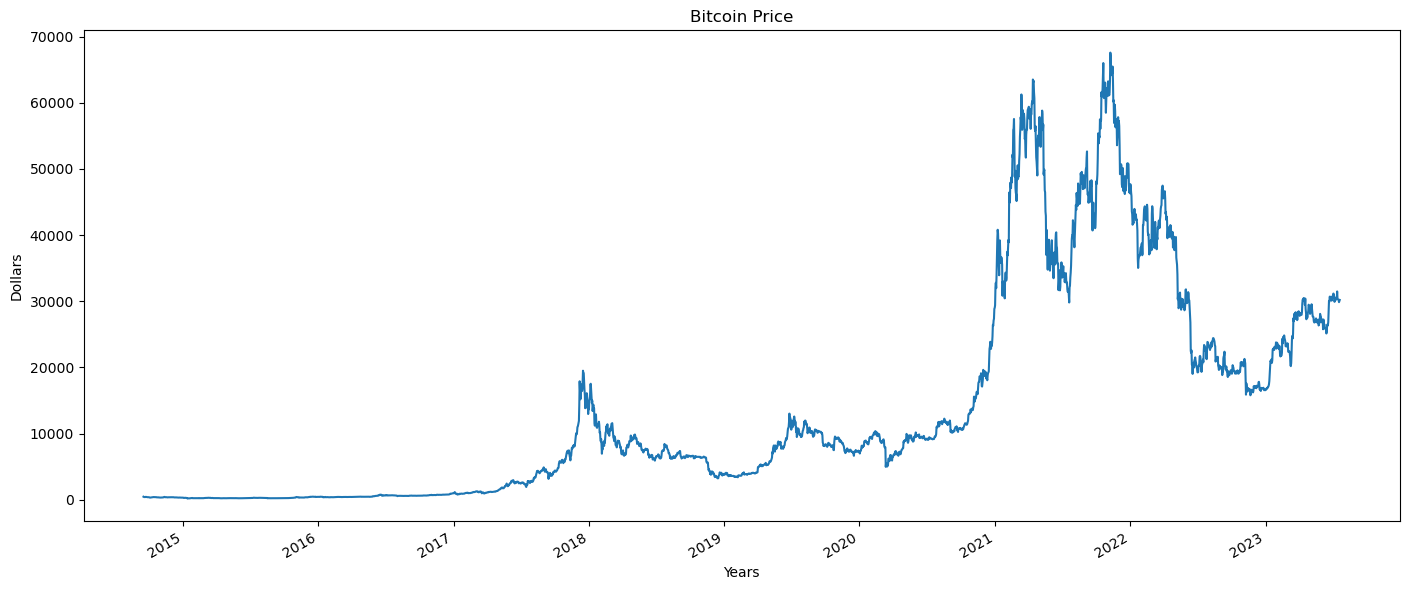

In [20]:
df.Close.plot(title="Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Dollars')
plt.show()

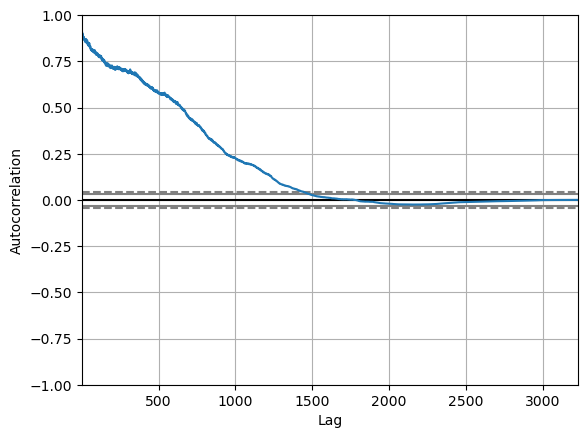

In [21]:
# df의 시계열 데이터에서 이전 시점의 데이터와 이후 시점의 데이터의 상관관계 확인
autocorrelation_plot(df)
plt.show()

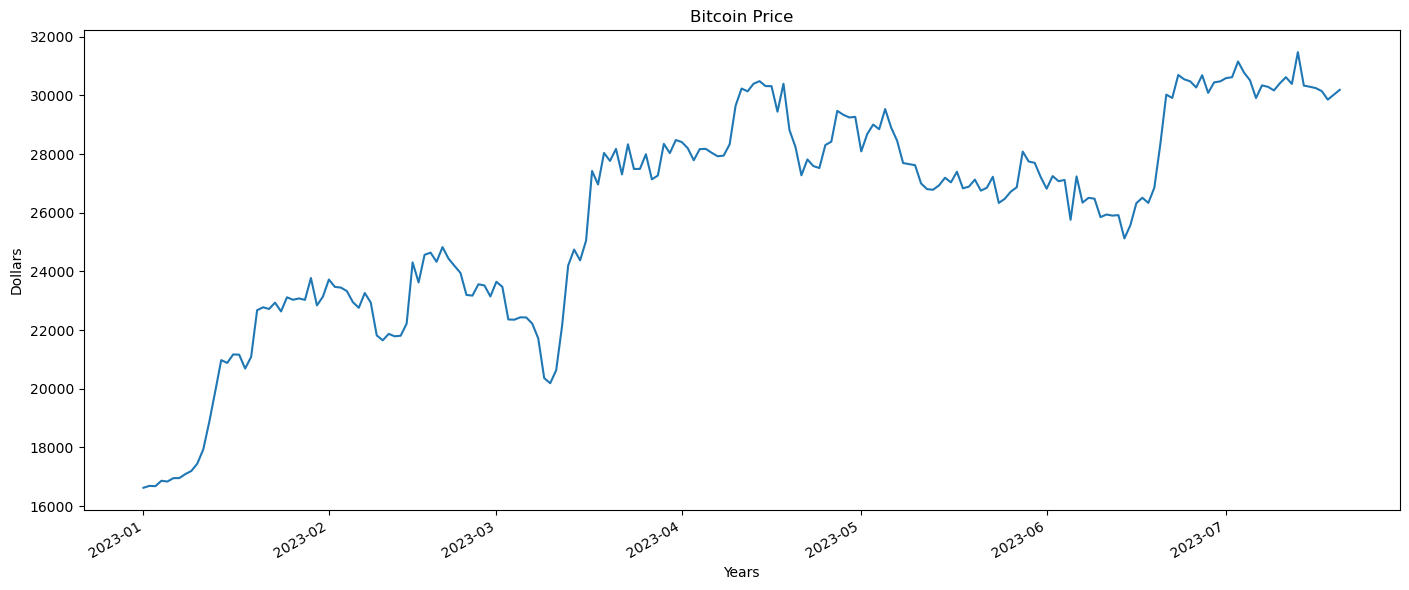

In [22]:
df.Close.iloc[-200:].plot(title="Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Years')
plt.ylabel('Dollars')
plt.show()

In [23]:
df2 = pd.read_csv('BTC-USD.csv')
df2.Date = pd.to_datetime(df2.Date, unit=None)
df2.index = df2.Date
df2 = df2.resample('D').mean()
df2 = df2.dropna()
# 최근 4년 내의 데이터만 선택
df2 = df2.iloc[(-365*4):]
print(df2.shape)

(1460, 6)


C:\Users\jh060\AppData\Local\Temp\ipykernel_22780\3057459230.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df2.resample('D').mean()


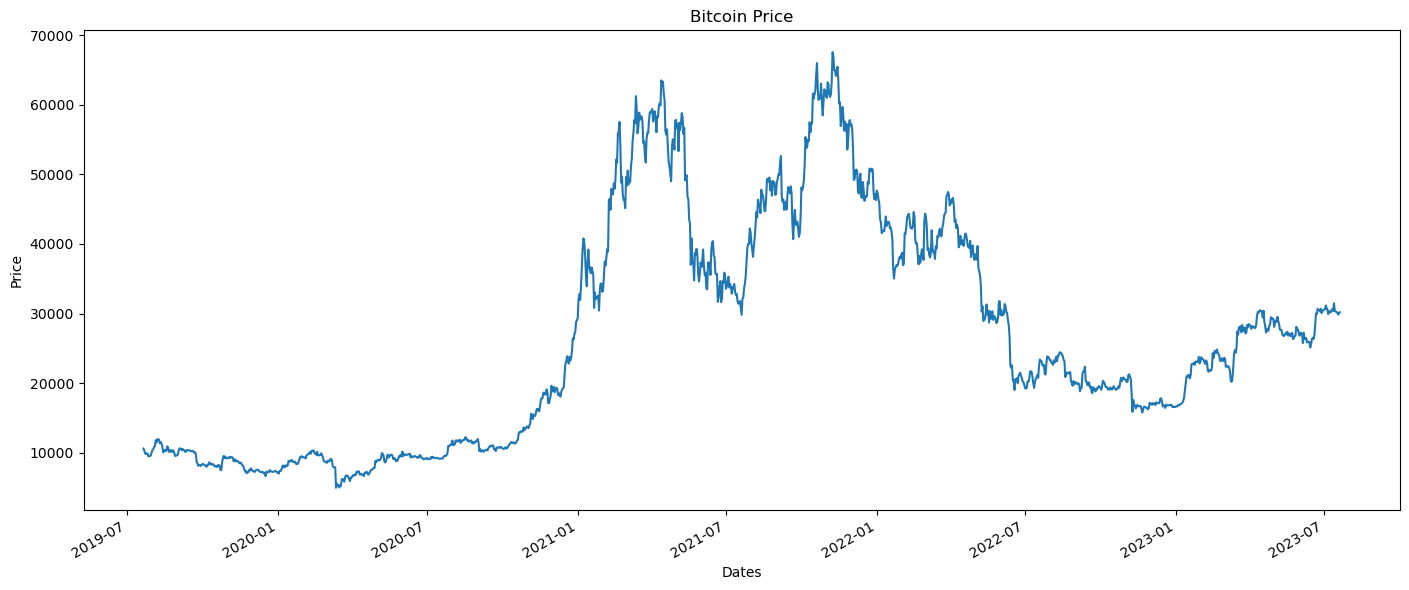

In [24]:
df2.Close.plot(title = "Bitcoin Price", figsize=(14,6))
plt.tight_layout()
plt.xlabel('Dates')
plt.ylabel('Price')
plt.show()

In [25]:
# 훈련 데이터와 테스트 데이터로 분리
df3 = df2.copy()
X = df3
size = int(len(X) * 0.7)
data_train, data_test = X[0:size], X[size:len(X)]

In [26]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [30]:
# 훈련 데이터와 테스트 데이터의 특성과 레이블 분리
X_train, y_train = create_features(data_train, label='Close')
X_test, y_test = create_features(data_test, label='Close')

C:\Users\jh060\AppData\Local\Temp\ipykernel_22780\2648855820.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = df.index
C:\Users\jh060\AppData\Local\Temp\ipykernel_22780\2648855820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['date'].dt.hour
C:\Users\jh060\AppData\Local\Temp\ipykernel_22780\2648855820.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [38]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3, 4, 5, 6, 7], 'learning_rate': [0.01, 0.05, 0.1]}
model =  xgb.XGBRegressor(objective ='reg:linear',min_child_weight=10, booster='gbtree', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
gs_model = GridSearchCV(model,parameters,n_jobs=-1,scoring='f1',cv=5)
gs_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], early_stopping_rounds=50, eval_metric='rmse')

[0]	validation_0-rmse:18924.92609	validation_1-rmse:6110.65793
[1]	validation_0-rmse:18912.68416	validation_1-rmse:6100.49967
[2]	validation_0-rmse:18900.88194	validation_1-rmse:6090.78032
[3]	validation_0-rmse:18900.88045	validation_1-rmse:6090.78548
[4]	validation_0-rmse:18888.03087	validation_1-rmse:6082.34812
[5]	validation_0-rmse:18721.88328	validation_1-rmse:6170.91144
[6]	validation_0-rmse:18552.01534	validation_1-rmse:6307.69955
[7]	validation_0-rmse:18540.55105	validation_1-rmse:6299.02291
[8]	validation_0-rmse:18529.30379	validation_1-rmse:6290.74136
[9]	validation_0-rmse:18518.27553	validation_1-rmse:6282.86341
[10]	validation_0-rmse:18508.71746	validation_1-rmse:6275.97804
[11]	validation_0-rmse:18497.41842	validation_1-rmse:6268.82844
[12]	validation_0-rmse:18486.97116	validation_1-rmse:6262.02201
[13]	validation_0-rmse:18476.72511	validation_1-rmse:6255.57664
[14]	validation_0-rmse:18470.54321	validation_1-rmse:6251.44002
[15]	validation_0-rmse:18470.32778	validation_1-rm

C:\Users\jh060\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
C:\Users\jh060\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\jh060\anaconda3\Lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\jh060\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:28:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now depreca

GridSearchCV(cv=5,
             estimator=XGBRegressor(alpha=10, base_score=None, booster='gbtree',
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None, colsample_bytree=0.3,
                                    device=None, early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=10, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 4, 5, 6, 7]},
             scoring='f1')

In [39]:
gs_model.best_params_

{'learning_rate': 0.01, 'max_depth': 3}

In [40]:
# assign predictions to data_test and then data_all
data_test['Price_Prediction'] = gs_model.predict(X_test)
data_all = pd.concat([data_test, data_train], sort=False)

C:\Users\jh060\AppData\Local\Temp\ipykernel_22780\1749687035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Price_Prediction'] = gs_model.predict(X_test)


<Axes: xlabel='Date'>

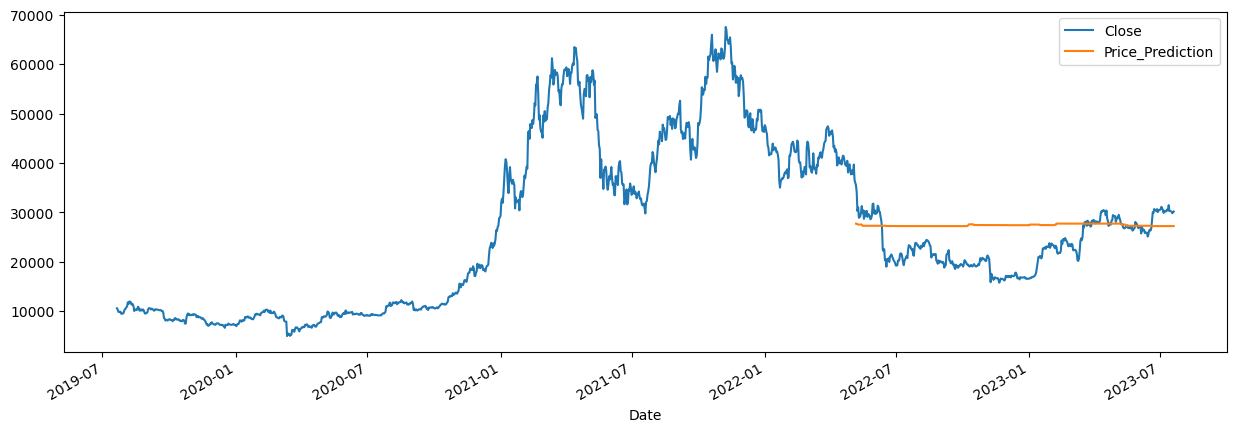

In [41]:
data_all[['Close','Price_Prediction']].plot(figsize=(15, 5))

In [42]:
data_test.head()

,Open,High,Low,Close,Adj Close,Volume,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Price_Prediction
Date,,,,,,,,,,,,,,,,
2022-05-07,36042.503906,36129.925781,34940.824219,35501.953125,35501.953125,2.437590e+10,2022-05-07,0,5,2,5,2022,127,7,18,27746.501953
2022-05-08,35502.941406,35502.941406,33878.964844,34059.265625,34059.265625,3.676304e+10,2022-05-08,0,6,2,5,2022,128,8,18,27745.619141
2022-05-09,34060.015625,34222.074219,30296.953125,30296.953125,30296.953125,6.335549e+10,2022-05-09,0,0,2,5,2022,129,9,19,27602.941406
2022-05-10,30273.654297,32596.308594,29944.802734,31022.906250,31022.906250,5.981104e+10,2022-05-10,0,1,2,5,2022,130,10,19,27558.736328
2022-05-11,31016.183594,32013.402344,28170.414063,28936.355469,28936.355469,7.038886e+10,2022-05-11,0,2,2,5,2022,131,11,19,27560.136719


In [43]:
# 평균 제곱근 오차
rmse = np.sqrt(mean_squared_error(data_test['Close'], data_test['Price_Prediction']))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 6082.348


- 데이터 : https://www.kaggle.com/datasets/arslanr369/bitcoin-price-2014-2023/data